In [1]:
'''
This script produces plots to analyse data from the diffent locations and are discussed in section 3 of the paper.

The following plots where made: 
- Difference between delivered KWh and requested KWh
- Difference between disconnection time and requested departure
- Scatterplot of Time Difference vs KWh Difference
- Heatmap of Time Difference vs KWh Difference
'''

'\nThis script produces plots to analyse data from the diffent locations and are discussed in section 3 of the paper.\n\nThe following plots where made: \n- Difference between delivered KWh and requested KWh\n- Difference between disconnection time and requested departure\n- Scatterplot of Time Difference vs KWh Difference\n- Heatmap of Time Difference vs KWh Difference\n'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns

# Bestand inlezen
df1 = pd.read_csv("Data/acndata_sessions 2019_11 till 2020_5 office1.csv")
df2 = pd.read_csv("Data/acndata_sessions 2019_11 till 2020_5 jpl.csv")
df3 = pd.read_csv("Data/acndata_sessions 2019_11 till 2020_5 caltech.csv")

df = pd.concat([df1, df2, df3], ignore_index=True)

df.head()

C:\Users\chris\AppData\Local\Temp\ipykernel_19952\4193494757.py:9: DtypeWarning: Columns (169,170,171,177,178,179,185,186,187) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("Data/acndata_sessions 2019_11 till 2020_5 jpl.csv")


,_id,clusterID,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,...,userInputs/20/requestedDeparture,userInputs/20/userID,userInputs/21/WhPerMile,userInputs/21/kWhRequested,userInputs/21/milesRequested,userInputs/21/minutesAvailable,userInputs/21/modifiedAt,userInputs/21/paymentRequired,userInputs/21/requestedDeparture,userInputs/21/userID
0,5dd1f41ef9af8b2deaac58c8,102,"Fri, 01 Nov 2019 14:13:26 GMT","Fri, 01 Nov 2019 23:22:07 GMT","Fri, 01 Nov 2019 16:11:42 GMT",12.260,19_102_260_1635_2019-11-01 14:13:25.539059,19,1,19-102-260-1635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5dd1f41ef9af8b2deaac58c9,102,"Fri, 01 Nov 2019 14:24:29 GMT","Fri, 01 Nov 2019 22:20:20 GMT","Fri, 01 Nov 2019 20:56:55 GMT",34.153,19_102_260_1633_2019-11-01 14:24:29.364122,19,2,19-102-260-1633,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5dd1f41ef9af8b2deaac58ca,102,"Fri, 01 Nov 2019 15:10:38 GMT","Fri, 01 Nov 2019 20:19:04 GMT","Fri, 01 Nov 2019 17:06:29 GMT",5.844,19_102_260_1634_2019-11-01 15:10:38.255284,19,3,19-102-260-1634,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5dd1f41ef9af8b2deaac58cb,102,"Fri, 01 Nov 2019 16:48:06 GMT","Fri, 01 Nov 2019 18:28:35 GMT","Fri, 01 Nov 2019 18:28:27 GMT",10.801,19_102_260_1637_2019-11-01 16:48:06.200767,19,7,19-102-260-1637,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5dd1f41ef9af8b2deaac58cc,102,"Fri, 01 Nov 2019 17:25:03 GMT","Fri, 01 Nov 2019 19:12:45 GMT","Fri, 01 Nov 2019 19:12:41 GMT",5.703,19_102_260_1640_2019-11-01 17:25:02.756655,19,8,19-102-260-1640,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Calculate the amount of rows without user input per data set
no_input_1 = df1["userInputs/0/requestedDeparture"].isna().sum()
no_input_2 = df2["userInputs/0/requestedDeparture"].isna().sum()
no_input_3 = df3["userInputs/0/requestedDeparture"].isna().sum()
no_input_total = df["userInputs/0/requestedDeparture"].isna().sum()

#Calculate the total amount of rows in each dataset
total_1 = len(df1)
total_2 = len(df2)
total_3 = len(df3)
total_total = len(df)

#Calculate teh percentage without user input per dataset
percentage_1 = (no_input_1 / total_1) * 100
percentage_2 = (no_input_2 / total_2) * 100
percentage_3 = (no_input_3 / total_3) * 100
percentage_total = (no_input_total / total_total) * 100

# Print the percentage
print(f"Office1 dataset: {no_input_1} sessions without user input ({percentage_1:.2f}%)")
print(f"JPL dataset: {no_input_2} sessions without user input ({percentage_2:.2f}%)")
print(f"Caltech dataset: {no_input_3} sessions without user input ({percentage_3:.2f}%)")
print(f"Total dataset: {no_input_total} sessions without user input ({percentage_total:.2f}%)")

Office1 dataset: 418 sessions without user input (76.70%)
JPL dataset: 203 sessions without user input (2.95%)
Caltech dataset: 668 sessions without user input (19.04%)
Total dataset: 1289 sessions without user input (11.79%)


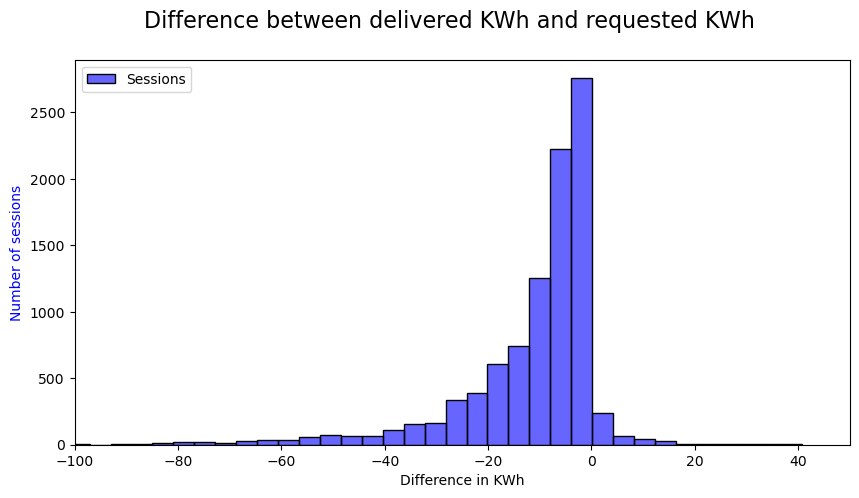

In [4]:
# Calculate the time difference in minutes
df["kWhDifference"] = (df["kWhDelivered"] - df["userInputs/0/kWhRequested"])

# CAlculate the mean and standard deviation
mean_time_diff = df["kWhDifference"].mean()
std_time_diff = df["kWhDifference"].std()

# Histogram 
fig, ax1 = plt.subplots(figsize=(10, 5))

sns.histplot(df["kWhDifference"], bins=50, kde=False, color="blue", edgecolor="black", alpha=0.6, ax=ax1)
ax1.set_xlabel("Difference in KWh")
ax1.set_ylabel("Number of sessions", color="blue")
ax1.tick_params(axis='y')

# Normal distribution
xmin, xmax = df["kWhDifference"].min(), df["kWhDifference"].max()
x = np.linspace(xmin, xmax, 100)
y = stats.norm.pdf(x, mean_time_diff, std_time_diff)

# Correcting the axis
ax1.set_xlim(-100, 50)  
ax1.set_ylim(0, ax1.get_ylim()[1])  

fig.suptitle("Difference between delivered KWh and requested KWh", fontsize=16)
ax1.legend(["Sessions"], loc="upper left")

plt.show()

In [5]:
threshold = -20  
num_below_threshold = (df["kWhDifference"] < threshold).sum()
total_sessions = len(df)

percentage_below_threshold = (num_below_threshold / total_sessions) * 100
print(f"Percentage van de sessies met minder dan {threshold} kWh: {percentage_below_threshold:.2f}%")

Percentage van de sessies met minder dan -20 kWh: 15.20%


<>:45: SyntaxWarning: invalid escape sequence '\m'
<>:45: SyntaxWarning: invalid escape sequence '\s'
<>:45: SyntaxWarning: invalid escape sequence '\m'
<>:45: SyntaxWarning: invalid escape sequence '\s'
C:\Users\chris\AppData\Local\Temp\ipykernel_19952\3590914061.py:45: SyntaxWarning: invalid escape sequence '\m'
  f"$\mu = {mean_time_diff:.2f}$\n$\sigma = {std_time_diff:.2f}$",
C:\Users\chris\AppData\Local\Temp\ipykernel_19952\3590914061.py:45: SyntaxWarning: invalid escape sequence '\s'
  f"$\mu = {mean_time_diff:.2f}$\n$\sigma = {std_time_diff:.2f}$",


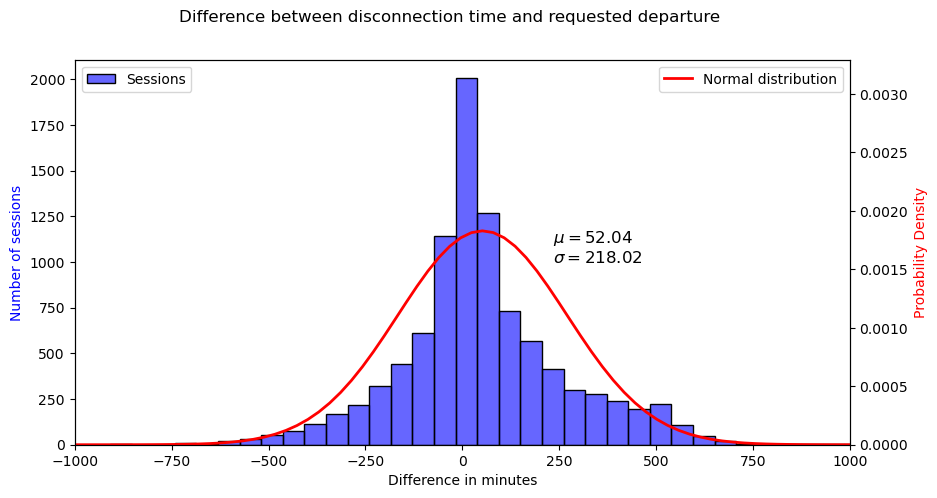

In [6]:
# COnvert data to date-time

df["disconnectTime"] = pd.to_datetime(df["disconnectTime"])
df["userInputs/0/requestedDeparture"] = pd.to_datetime(df["userInputs/0/requestedDeparture"])

# BCalculate time difference in minutes
df["time_difference"] = (df["disconnectTime"] - df["userInputs/0/requestedDeparture"]).dt.total_seconds() / 60
df = df[df["time_difference"].between(-1500, 1500)]  

# Calculate mean and standard deviation
mean_time_diff = df["time_difference"].mean()
std_time_diff = df["time_difference"].std()

# Histogram 
fig, ax1 = plt.subplots(figsize=(10, 5))

sns.histplot(df["time_difference"], bins=50, kde=False, color="blue", edgecolor="black", alpha=0.6, ax=ax1)
ax1.set_xlabel("Difference in minutes")
ax1.set_ylabel("Number of sessions", color="blue")
ax1.tick_params(axis='y')

# Making seconf y-axis for normal distribution
ax2 = ax1.twinx()

# Normal distibution
xmin, xmax = df["time_difference"].min(), df["time_difference"].max()
x = np.linspace(xmin, xmax, 100)
y = stats.norm.pdf(x, mean_time_diff, std_time_diff)

ax2.plot(x, y, 'r-', label='Normal distribution', linewidth=2)

# Correcting axis
ax1.set_xlim(-1000, 1000)  # x-as begint bij -1000 en eindigt bij 1000
ax1.set_ylim(0, ax1.get_ylim()[1])  # Linker-as start bij 0
ax2.set_ylim(0, max(y) * 1.8)  # Rechter-as begint bij 0 en heeft wat extra ruimte bovenaan

ax2.set_ylabel("Probability Density", color="red")
ax2.tick_params(axis='y')

tick_interval = 0.0005  
max_tick = np.ceil((max(y) * 1.8) / tick_interval) * tick_interval  
ax2.set_yticks(np.arange(0, max_tick, tick_interval))

plt.text(xmin + 0.55 * (xmax - xmin), max(y) * 0.85, 
         f"$\mu = {mean_time_diff:.2f}$\n$\sigma = {std_time_diff:.2f}$", 
         fontsize=12, color='black')


fig.suptitle("Difference between disconnection time and requested departure")
ax1.legend(["Sessions"], loc="upper left")
ax2.legend(["Normal distribution"], loc="upper right")

plt.show()

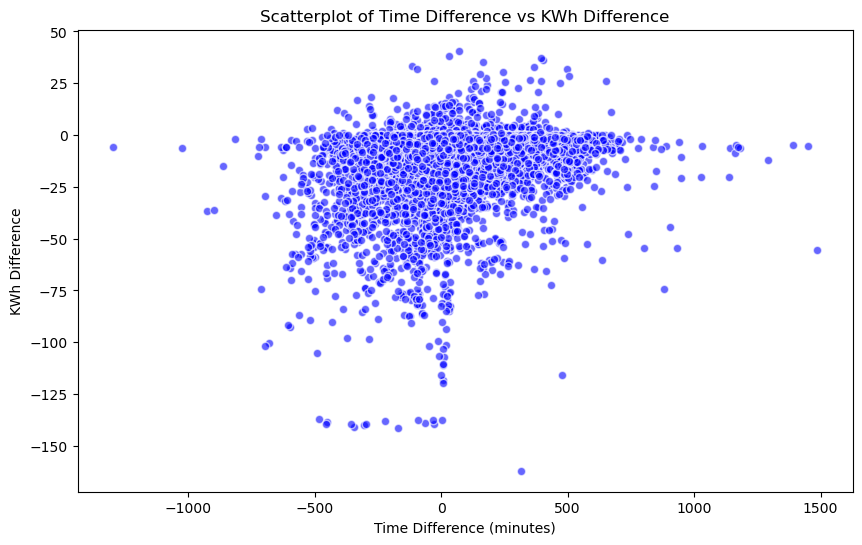

In [7]:
# Scatterplot 
plt.figure(figsize=(10, 6))
plt.scatter(df["time_difference"], df["kWhDifference"], alpha=0.6, edgecolors='w', color='blue')


plt.xlabel("Time Difference (minutes)")
plt.ylabel("KWh Difference")
plt.title("Scatterplot of Time Difference vs KWh Difference")

plt.show()

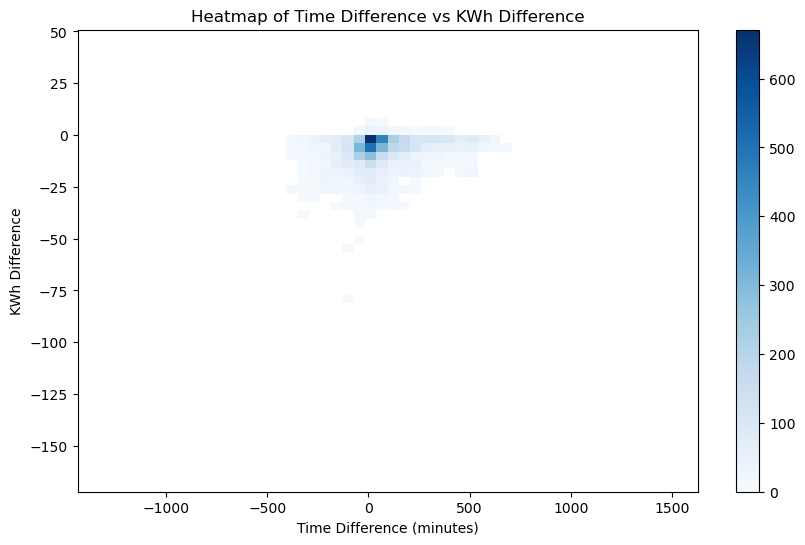

In [8]:
plt.figure(figsize=(10, 6))

# Making a heatmap with seaborn
sns.histplot(
    data=df, 
    x="time_difference", 
    y="kWhDifference", 
    bins=50, 
    cmap="Blues",
    pthresh=0.1,  
    cbar=True,    # Show color scale
)

plt.xlabel("Time Difference (minutes)")
plt.ylabel("KWh Difference")
plt.title("Heatmap of Time Difference vs KWh Difference")

plt.show()

In [9]:
people_with_1st_input = len(df) - df["userInputs/0/requestedDeparture"].isna().sum()
people_without_1st_input = df["userInputs/0/requestedDeparture"].isna().sum()
people_with_2nd_input = len(df) - df["userInputs/1/requestedDeparture"].isna().sum()
people_without_2nd_input = df["userInputs/1/requestedDeparture"].isna().sum()

product1 = (people_with_1st_input / len(df)) * (people_with_2nd_input / len(df))
product2 = (people_with_1st_input / len(df)) * (people_without_2nd_input / len(df))
product3 = (people_without_1st_input / len(df)) * (people_with_2nd_input / len(df))
product4 = (people_without_1st_input / len(df)) * (people_without_2nd_input / len(df))

print("Percentage of people with 1st and with 2nd input =", product1)
print("Percentage of people with 1st and without 2nd input =", product2)
print("Percentage of people without 1st and with 2nd input =", product3)
print("Percentage of people without 1st and without 2nd input =", product4)

Percentage of people with 1st and with 2nd input = 0.17866777339697032
Percentage of people with 1st and without 2nd input = 0.8213322266030296
Percentage of people without 1st and with 2nd input = 0.0
Percentage of people without 1st and without 2nd input = 0.0
